# Breast Cancer Prediction

_Breast Cancer Prediction Using LogisticRegression_

__Features of the Dataset__

- **Clump thickness** is a measure of how thick the cells are within a tumor. Benign cells tend to be grouped in mono-layers, while cancerous - in multi-layer.(Sarkar et al. 2017, p. 1)

- __Uniformity of cell size__ and __uniformity of cell shape__ are two characteristics that can be used to describe the appearance of cells under a microscope. Here we are checking the degree to which the cells in a sample are similar in size and shape.

- __Marginal adhesion__ is the degree to which cells in a tissue sample adhere, or stick, to one another at the edges of the sample. Loss of adhesion might be a sign of malignancy.

- __Single epithelial cell size__ is the size of individual cells in an epithelial tissue sample. Epithelial tissue is a type of tissue that covers the surface of the body and lines internal organs and structures. It is made up of cells that are tightly packed together and held in place by specialized junctions.

- __Bare nuclei__ refers to cells in a tissue sample that are missing their cell membranes and cytoplasm, leaving only the nucleus visible.

- __Bland chromatin__ is the appearance of the genetic material (chromatin) in the nucleus of a cell under a microscope. Chromatin is made up of DNA and proteins, and it contains the genetic information that controls the cell’s functions. When the chromatin in a cell’s nucleus is compact and uniform in appearance, it is said to be “bland.”

- __Normal nucleoli__ are small, spherical structures found within the nucleus of a cell. They are composed of DNA, RNA, and proteins and are responsible for synthesizing ribosomes, which are the cellular structures that produce proteins. Nucleoli are usually visible under a microscope and can vary in size and appearance depending on the stage of the cell cycle and the cell’s function. In normal, healthy cells, nucleoli are usually small and have a distinct, well-defined border.

- __Mitosis__ is the process of cell division that occurs in all living organisms. During mitosis, a single cell divides into two daughter cells, each of which contains a copy of the parent cell’s DNA. The process of mitosis is essential for the growth and repair of tissues and the production of new cells.

__Importing Libraries__

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


__Loading the Dataset__

In [3]:
dataset = pd.read_csv(r'breast_cancer.csv')
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
dataset.shape

(683, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [6]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
dataset.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
dataset.columns.tolist()

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

In [9]:
dataset['Class'].unique()

array([2, 4], dtype=int64)

from the above output two uniques values for breast cancer 
- __2__ for not breast cance
- __4__ for likely a breast cancer

In [10]:
dataset['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [11]:
column_list = list(dataset)
for i in column_list:
    print(i)
    print(dataset[i].unique())
    print("#################################")

Clump Thickness
[ 5  3  6  4  8  1  2  7 10  9]
#################################
Uniformity of Cell Size
[ 1  4  8 10  2  3  7  5  6  9]
#################################
Uniformity of Cell Shape
[ 1  4  8 10  2  3  5  6  7  9]
#################################
Marginal Adhesion
[ 1  5  3  8 10  4  6  2  9  7]
#################################
Single Epithelial Cell Size
[ 2  7  3  1  6  4  5  8 10  9]
#################################
Bare Nuclei
[ 1 10  2  4  3  9  7  5  8  6]
#################################
Bland Chromatin
[ 3  9  1  2  4  5  7  8  6 10]
#################################
Normal Nucleoli
[ 1  2  7  4  5  3 10  6  9  8]
#################################
Mitoses
[ 1  5  4  2  3  7 10  8  6]
#################################
Class
[2 4]
#################################


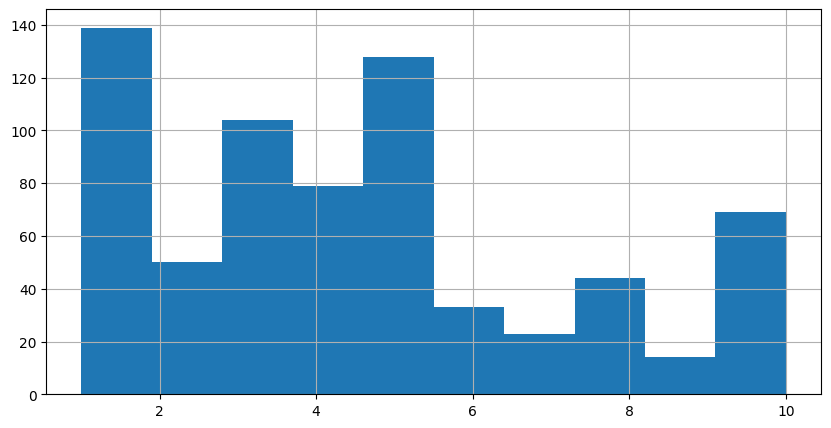

In [12]:
dataset['Clump Thickness'].hist(figsize=(10,5))
plt.show();

In [13]:
dataset["Class"].replace(4,1,inplace=True)
dataset["Class"].replace(2,0,inplace=True)

In [14]:
dataset.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


<Axes: >

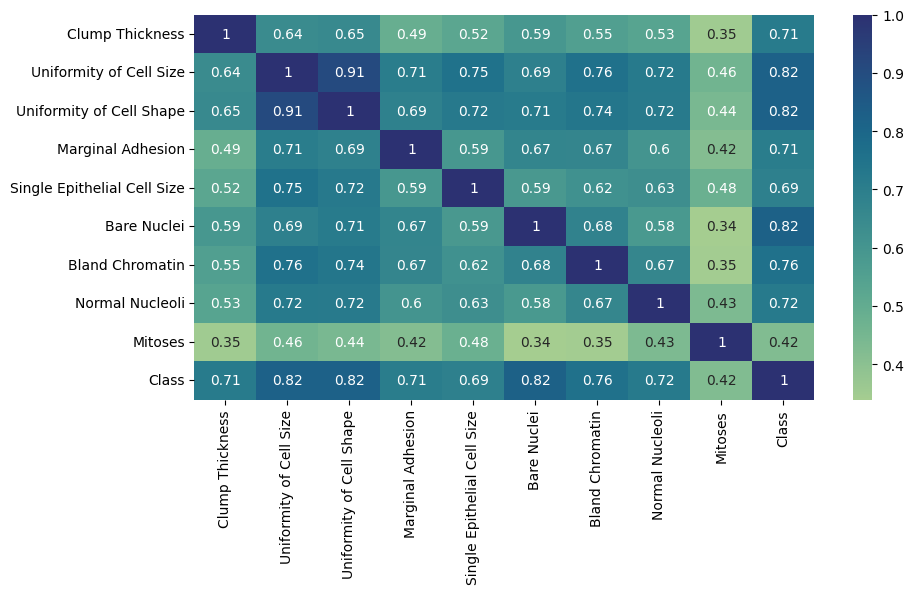

In [15]:
plt.figure(figsize=(10,5))
sb.heatmap(dataset.corr(),annot=True, cmap='crest')

In [16]:
Y = dataset['Class']
X = dataset.drop("Class",axis=1)

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(512, 9)
(171, 9)
(512,)
(171,)


In [19]:
columns = X_train.columns

In [20]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train = pd.DataFrame(X_train,columns=columns)
X_test = pd.DataFrame(X_test,columns=columns)

In [22]:
X_train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,2.081668e-17,2.775558e-17,-1.734723e-17,3.469447e-17,-2.775558e-17,2.255141e-17,-6.938894e-18,7.979728e-17,6.375109e-17
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.225238e+00,-6.925732e-01,-7.321981e-01,-6.368527e-01,-1.006730e+00,-6.892455e-01,-9.916697e-01,-5.989596e-01,-3.450823e-01
25%,-8.657412e-01,-6.925732e-01,-7.321981e-01,-6.368527e-01,-5.517912e-01,-6.892455e-01,-5.682044e-01,-5.989596e-01,-3.450823e-01
50%,-1.467477e-01,-6.925732e-01,-7.321981e-01,-6.368527e-01,-5.517912e-01,-6.892455e-01,-1.447391e-01,-5.989596e-01,-3.450823e-01
75%,5.722458e-01,6.122933e-01,5.785901e-01,4.241080e-01,3.580867e-01,4.824719e-01,2.787262e-01,7.801019e-02,-3.450823e-01
max,2.010233e+00,2.243377e+00,2.217075e+00,2.546029e+00,3.087721e+00,1.792038e+00,2.819518e+00,2.447404e+00,5.157130e+00


In [23]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)


LogisticRegression()

In [24]:
Y_pred = logreg.predict(X_test)

In [25]:
Y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [26]:
print("Model Accuracy: ", accuracy_score(Y_test,Y_pred))

Model Accuracy:  0.9532163742690059


In [27]:
Y_test.value_counts()

Class
0    103
1     68
Name: count, dtype: int64

In [28]:
cm = confusion_matrix(Y_pred,Y_test)
cm

array([[102,   7],
       [  1,  61]], dtype=int64)

<Axes: >

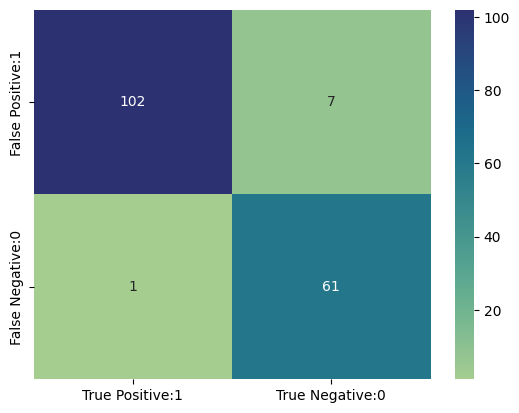

In [29]:
cm_matrix = pd.DataFrame(data=cm,columns=['True Positive:1', 'True Negative:0'],
                         index=['False Positive:1', 'False Negative:0'])
sb.heatmap(data=cm_matrix, annot = True , fmt='d', cmap = "crest")

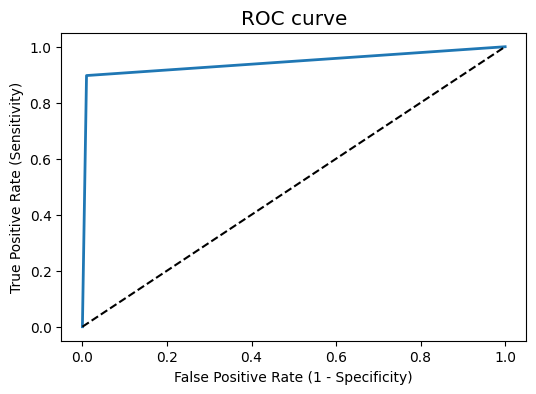

In [30]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
# print(fpr)
# print(tpr)
# thresholds
plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()
